In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        print(gpus[0])
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
        
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   try:
#     print(gpus[0])
#     tf.config.experimental.set_virtual_device_configuration(
#         gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
#   except RuntimeError as e:
#     print(e)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
1 Physical GPUs, 1 Logical GPUs


In [59]:
train_data = np.genfromtxt('nav_robot_train.csv', delimiter=',')
max_0 = 360
max_1 = 250
max_2 = 270
train_data

array([[339.71744091,  98.08159868, 180.        ],
       [200.44954761,  62.96824597,   0.        ],
       [242.43487469, 179.35997324,   0.        ],
       ...,
       [ 89.58780726, 139.00359708, -90.        ],
       [ 86.86364163, 146.21901381, -90.        ],
       [ 94.42697165, 155.46382216, -90.        ]])

In [58]:
x = np.delete(train_data, 2, 1)
x_max = np.array([max_0, max_1])
x = x / x_max
x[:10]

array([[0.94365956, 0.39232639],
       [0.5568043 , 0.25187298],
       [0.67343021, 0.71743989],
       [0.38559465, 0.72284992],
       [0.45226193, 0.40613298],
       [0.41028895, 0.50159745],
       [0.31689777, 0.57834246],
       [0.91776541, 0.40485059],
       [0.9132244 , 0.57075389],
       [0.81586267, 0.64657869]])

In [61]:
y = np.delete(train_data, [0,1], 1)
y_max = np.array([max_2])
y = (y + 90) / y_max
y[:10]

array([[1.        ],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [1.        ],
       [1.        ],
       [1.        ]])

In [62]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(2,), use_bias=True, activation='tanh'))
model.add(tf.keras.layers.Dense(4, use_bias=True, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, use_bias=True, activation='linear'))
# optimizer = tf.keras.optimizers.experimental.SGD(
#     learning_rate=0.2,
#     momentum=0.0,
#     nesterov=True,
#     amsgrad=False)

optimizer = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='cosine_similarity', metrics=['accuracy'])

In [63]:
N=100
history = model.fit(x, y, verbose=0, epochs=N)

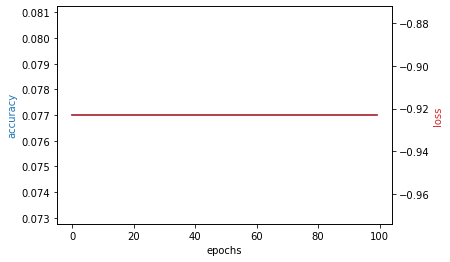

In [64]:
loss = history.history['loss']
acc = history.history['accuracy']
xdata = history.epoch

fig, ax1 = plt.subplots()
ax1.set_xlabel('epochs')
ax1.set_ylabel('accuracy', color='tab:blue')
ax1.plot(xdata, acc, color='tab:blue')
ax2 = ax1.twinx()
ax2.set_ylabel('loss', color='tab:red')
ax2.plot(xdata, loss, color='tab:red')

In [9]:
test_data = np.genfromtxt('nav_robot_test.csv', delimiter=',')
test_data

array([[ 62.10272897,  76.94153625, 180.        ],
       [199.30630034, 166.355042  ,   0.        ],
       [169.07719528, 116.10340219,   0.        ],
       ...,
       [289.55825154,  80.65358021,  90.        ],
       [ 99.59890307, 137.93114224, -90.        ],
       [206.33768817, 112.69871339,   0.        ]])

In [67]:
eval_x = np.delete(test_data, 2, 1)
eval_x = eval_x / x_max
eval_x[:10]

array([[0.17250758, 0.30776614],
       [0.55362861, 0.66542017],
       [0.46965888, 0.46441361],
       [0.39066819, 0.46043458],
       [0.00130452, 0.48801639],
       [0.59524132, 0.53254108],
       [0.1650577 , 0.40886183],
       [0.31864111, 0.49756206],
       [0.0930651 , 0.34058773],
       [0.62920947, 0.53475976]])

In [68]:
eval_y = np.delete(test_data, [0,1], 1)
eval_y = (eval_y + 90) / y_max
eval_y[:10]

array([[1.        ],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [1.        ],
       [0.33333333],
       [1.        ],
       [0.33333333],
       [1.        ],
       [0.33333333]])

In [69]:
prediction = model.predict(eval_x)
prediction[:10]

32/32 [==============================] - 0s 2ms/step


array([[0.41623935],
       [0.4357646 ],
       [0.42383778],
       [0.42383367],
       [0.42735165],
       [0.4278133 ],
       [0.42205006],
       [0.42631674],
       [0.41866496],
       [0.42800233]], dtype=float32)

In [20]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.8569522 , -3.7316647 , -0.8070111 , -0.16938128],
        [-0.86876273, -2.5762653 , -0.8413439 , -0.2827064 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=
 array([ 8.4933677e-21, -5.4814238e-02, -4.9671267e-22, -3.9467118e-03],
       dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[ 4.8400640e-02],
        [ 5.3166199e+00],
        [-4.6467781e-04],
        [-8.9975893e-01]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([87.13469], dtype=float32)>]

In [70]:
x_ticks = 50
x_range = np.linspace(0, 1, x_ticks)
y_ticks = 50
y_range = np.linspace(0, 1, y_ticks)
xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
zz = [model.predict(np.array([[xx[i][j], yy[i,j]] for i in range(x_ticks)]), verbose=0).flatten() for j in range(y_ticks)]
z = np.transpose(np.array(zz))
z

array([[0.40026364, 0.40141475, 0.4025647 , ..., 0.45224646, 0.45328453,
        0.4543189 ],
       [0.4000876 , 0.4012391 , 0.40238965, ..., 0.45237824, 0.45342693,
        0.45447156],
       [0.39991167, 0.4010631 , 0.402214  , ..., 0.45250103, 0.45356002,
        0.4546152 ],
       ...,
       [0.4025657 , 0.4035458 , 0.40453276, ..., 0.45541507, 0.4566546 ,
        0.45789632],
       [0.40296274, 0.40393877, 0.4049216 , ..., 0.4555807 , 0.45681584,
        0.4580534 ],
       [0.4033737 , 0.40434542, 0.40532416, ..., 0.45575532, 0.456986  ,
        0.45821896]], dtype=float32)

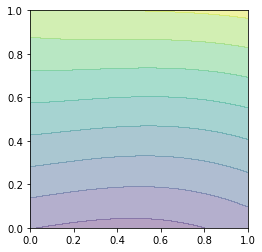

In [72]:
plt.figure()
plt.axis('scaled')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.contourf(xx, yy, z, alpha=0.4)